In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 3

#### (ii) MAP estimator using gradient descent

In $(i)$ we've got
$$\pi (x | y_{obs} = 2) \propto exp(1/8 (-4x^4 + 15 x^2 + 4 x - 20))$$

Now we need to maximize this function.
We can apply a log function  : log is monotonically increasing, and log(f(x)) has the same maxima as f(x). So, we'll further work with 
$$f(x) = -4x^4 + 15 x^2 + 4 x - 20$$
(We can drop the coefficient $1/8$ because it doesn't affect the maximum either.)
This function has the derivative
$$\frac{df(x)}{dx} = -16x^3+30x+4$$
which we'll use for the gradient descent.

In [2]:
def df(x):
    return -16*(x**3) + 30*x + 4

In [3]:
def map_grad_descent(x0, step=0.001, eps=0.001):
    x = x0
    dfx = np.infty
    while abs(dfx) > eps:
        dfx = df(x)
        x = x + step * dfx
        
    return x

In [4]:
m = map_grad_descent(0)
print("m =", m)

m = 1.4316375647527306


Using gradient descent, we can find only one local maximum. With X0=-1, it converges to another local maximum:

In [5]:
m_ = map_grad_descent(-1)
print("m' =", m_)

m' = -1.2969976296065684


We'll use the 1st value (m = 1.432) in the further calculations.

#### (iii) Laplace approximation

$$\pi (x | y_{obs} = 2) \propto exp(-g(x))$$
with $g(x) = \frac{1}{8} (4x^4 - 15x^2 -4x + 20)$\
Second derivative:
$$g''(x) = \frac{1}{8} (48 x^2 - 30) = 6x^2 - \frac{15}{4}$$
Plug in $x = m = 1.432$ (MAP estimator from $(ii)$):

In [6]:
ddg = 6 * (m**2) - 15/4
print("ddg(m) =", ddg)

ddg(m) = 8.547516700866773


Inverse of $g''(m)$:

In [7]:
ddg_inv = 1 / ddg
print("ddg_inv(m) =", ddg_inv)

ddg_inv(m) = 0.11699304429537923


So, the Laplace approximation to the posterior of $X$ is $\tilde\pi = N(1.432, 0.117)$

#### (iv) Histograms of samples

Laplace approximation:

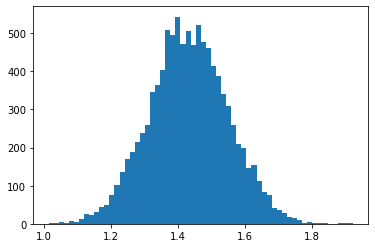

In [8]:
N = 10000
lapl = np.random.normal(m, ddg_inv, N)
    
plt.hist(lapl,bins=60);
    

Langevin SDE:

In [9]:
def nabla_g(x):
    return 1/8*(16*(x**3)-30*x-4)

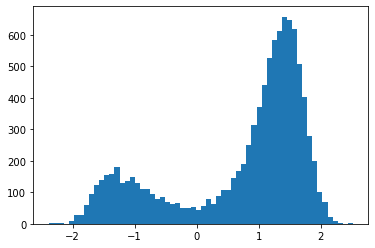

In [10]:
N = 10000
T = 100000
dt=0.001
lang = np.empty((N,T))
lang[:,0] = 0
for i in range(1, T):
    lang[:,i] = lang[:,i-1] - dt*nabla_g(lang[:,i-1]) + np.sqrt(2*dt)*np.random.normal(0, 1, N)

plt.hist(lang[:,T-1],bins=60);

The histogram obtained from the Laplassian approximation has only one peak, and the histogram obtained via Langevin SDE has two peaks, one of which corresponds to the only peak of approximation. The reason is that we use normal distribution in attempt to approximate a more complex distribution. As a result, only one peak was conserved. If we would use another initial point for gradient descent, the other peak would be conserved.